In [7]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [8]:
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict, plot_acs_hazard_3pp, plot_acs_hazard_4pp, plot_acs_hazard_1plus3
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

In [9]:
plot_acs_hazard_3pp?

Signature:
plot_acs_hazard_3pp(
    name='ncra_regions',
    regions=None,
    ds_gwl15=None,
    ds_gwl20=None,
    ds_gwl30=None,
    station_df_gwl15=None,
    station_df_gwl20=None,
    station_df_gwl30=None,
    stippling_gwl15=None,
    stippling_gwl20=None,
    stippling_gwl30=None,
    mask_not_australia=True,
    mask_australia=False,
    agcd_mask=False,
    facecolor='none',
    edgecolor='black',
    figsize=(10, 4),
    markersize=None,
    title=None,
    date_range='',
    subplot_titles=None,
    crs=None,
    area_linewidth=0.3,
    xlim=(114, 154),
    ylim=(-43.5, -7.5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x147d68a22d40>,
    cmap_bad='lightgrey',
    cbar_extend='both',
    ticks=None,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL IMAGE ONLY',
    

In [10]:
# Fire classes

In [11]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5




CPU times: user 70.1 ms, sys: 15.3 ms, total: 85.4 ms
Wall time: 93 ms


CPU times: user 1min 58s, sys: 295 ms, total: 1min 58s
Wall time: 1min 58s


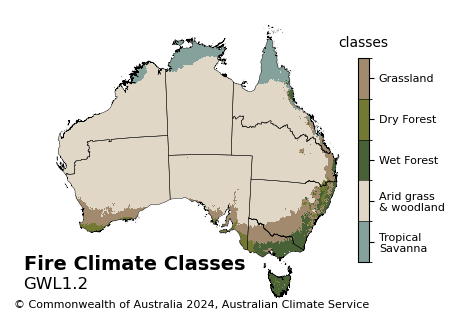

In [12]:
%%time
plot_acs_hazard(data=ds_gwl12[var],
                    stippling=None,
                    regions = regions,
                    title = "Fire Climate Classes",
                    date_range="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                figsize=(4.5,3),
                outfile="/g/data/mn51/users/gt3409/plotting_maps/figures/fire_climate_classes_gwl12.png",
                issued_date="",
                    );

CPU times: user 2min, sys: 254 ms, total: 2min
Wall time: 2min


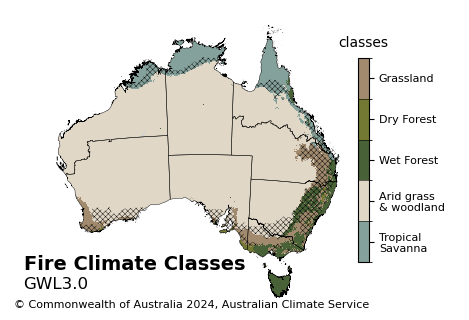

In [13]:
%%time
plot_acs_hazard(data=ds_gwl30[var],
                    stippling=stippling_gwl30,
                    regions = regions,
                    title = "Fire Climate Classes",
                    date_range="GWL3.0",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                figsize=(4.5,3),
                outfile="/g/data/mn51/users/gt3409/plotting_maps/figures/fire_climate_classes_gwl30.png",
                issued_date="",
                    );

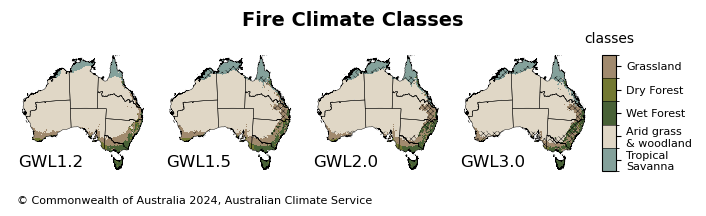

In [14]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire Climate Classes",
                    figsize=(7,2),
                    # baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    # dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                    );


CPU times: user 2min 6s, sys: 314 ms, total: 2min 6s
Wall time: 2min 6s


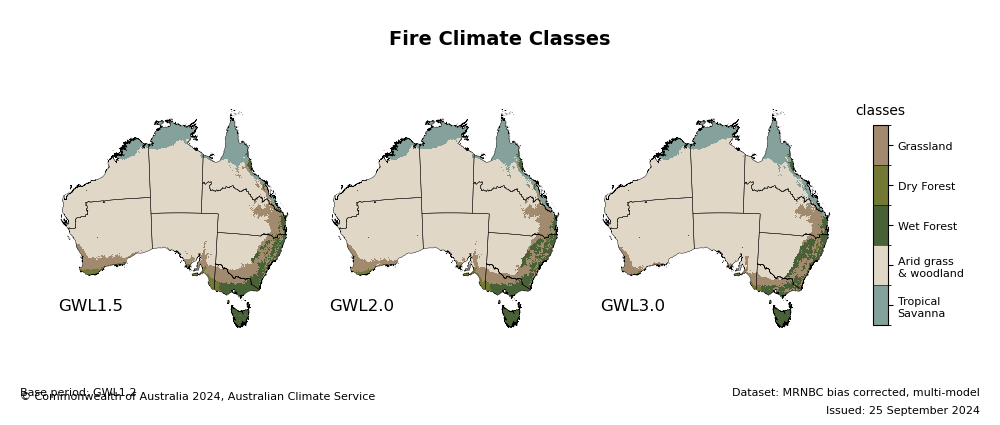

In [15]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    );

CPU times: user 2min 2s, sys: 243 ms, total: 2min 2s
Wall time: 2min 3s


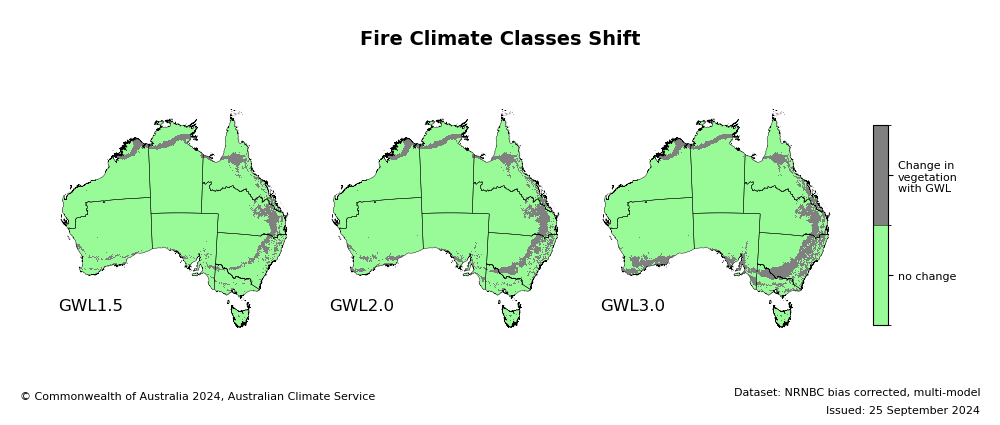

In [16]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Fire Climate Classes Shift",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no change", "Change in\nvegetation\nwith GWL",],
                    cbar_label = "",
                    dataset_name = "NRNBC bias corrected, multi-model",
                    watermark="",
                    );

CPU times: user 2min 2s, sys: 228 ms, total: 2min 2s
Wall time: 2min 2s


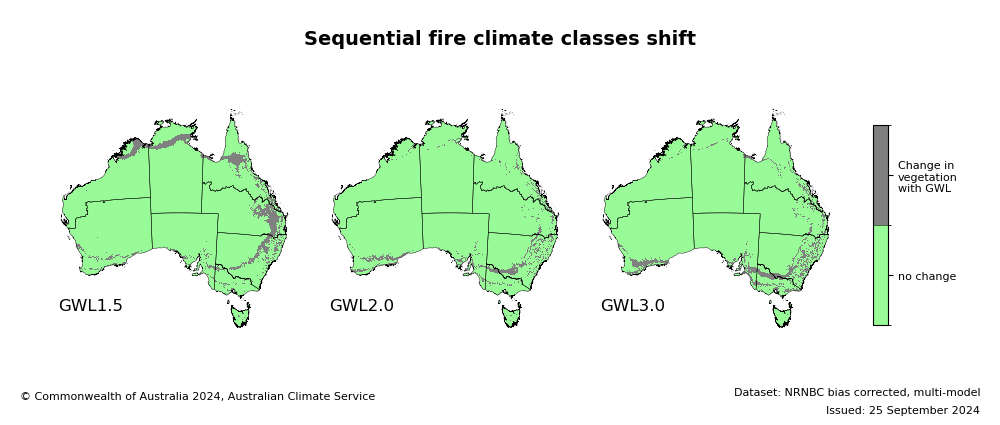

In [17]:
%%time 
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15_to_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2_to_GWL3.nc")

var = "fire_climate_class"

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Sequential fire climate classes shift",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no change", "Change in\nvegetation\nwith GWL",],
                    cbar_label = "",
                    dataset_name = "NRNBC bias corrected, multi-model",
                    watermark="",
                    );

CPU times: user 2min 6s, sys: 255 ms, total: 2min 6s
Wall time: 2min 6s


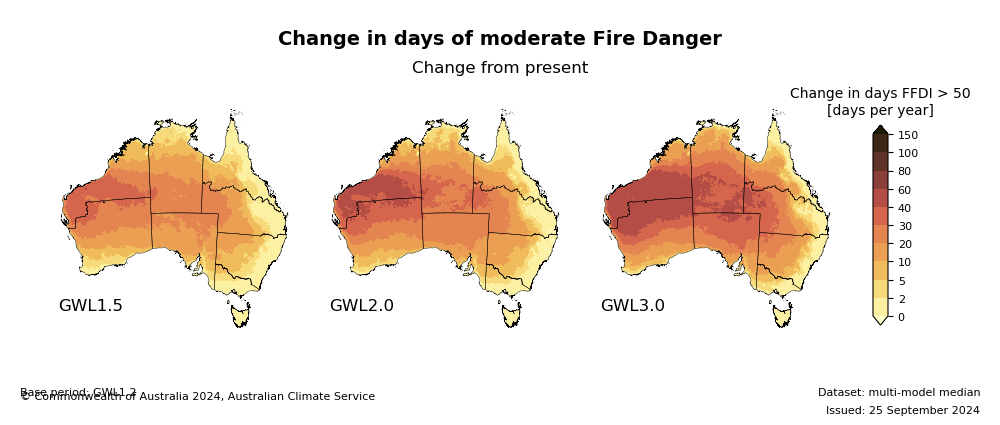

In [18]:
%%time 
# FFDI >50  multimodel median
var = "days50"

ffdi_ge50_mmm = xr.open_dataset(f"/g/data/ia39/ncra/fire/change_threshold_50.nc")

ds_gwl12 = ffdi_ge50_mmm.sel(period=0).drop_vars(["period"])
ds_gwl15 = ffdi_ge50_mmm.sel(period=1).drop_vars(["period"])
ds_gwl20 = ffdi_ge50_mmm.sel(period=2).drop_vars(["period"])
ds_gwl30 = ffdi_ge50_mmm.sel(period=3).drop_vars(["period"])


plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in days of moderate Fire Danger",
                    date_range="Change from present",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_temp_seq"],
                    ticks = [0, 2, 5, 10, 20, 30, 40, 60, 80, 100, 150],
                    cbar_label = "Change in days FFDI > 50\n[days per year]",
                    dataset_name = "multi-model median",
                    watermark="",
                    );

In [19]:
# heat

CPU times: user 2min 5s, sys: 320 ms, total: 2min 5s
Wall time: 2min 6s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

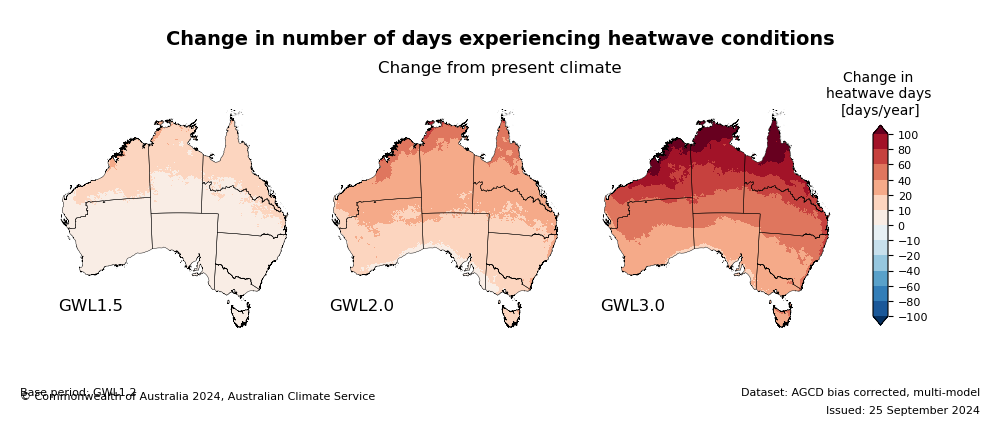

In [20]:
%%time 

var = "HWF"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")


plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in number of days experiencing heatwave conditions",
                    date_range = f"Change from present climate",
                    baseline="GWL1.2",
                    cmap = cmap_dict["tas_anom"],
                    ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
                    cbar_label = "Change in \nheatwave days \n[days/year]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    watermark="",)

CPU times: user 2min 2s, sys: 245 ms, total: 2min 3s
Wall time: 2min 3s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

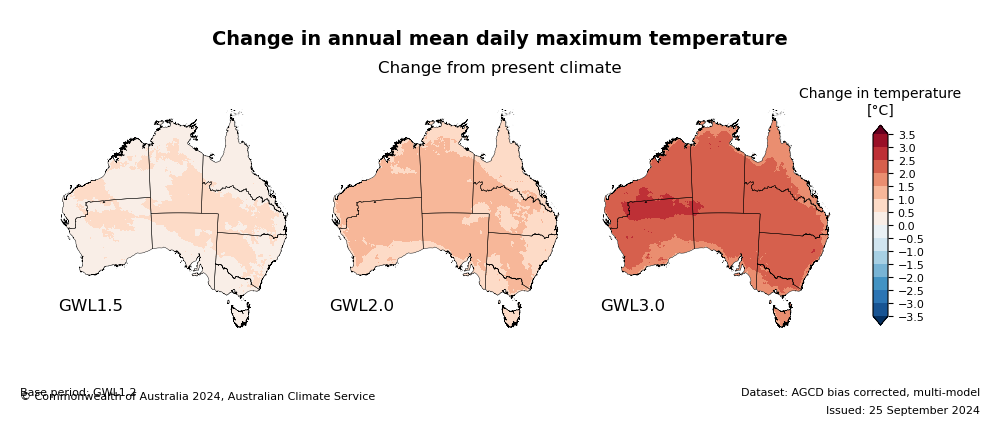

In [21]:
%%time 

var = "TXm"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in annual mean daily maximum temperature",
                    date_range = f"Change from present climate",
                    baseline="GWL1.2",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-3.5, 3.6, 0.5),
                    cbar_label = "Change in temperature\n[\N{DEGREE SIGN}C]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    watermark="",)

In [22]:
#tide gauge

CPU times: user 3min 56s, sys: 461 ms, total: 3min 56s
Wall time: 3min 56s


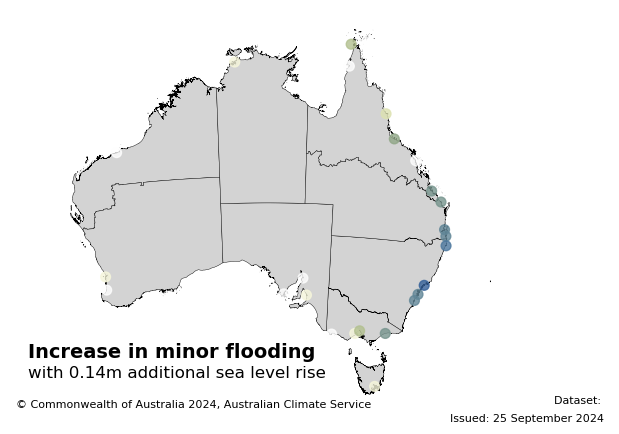

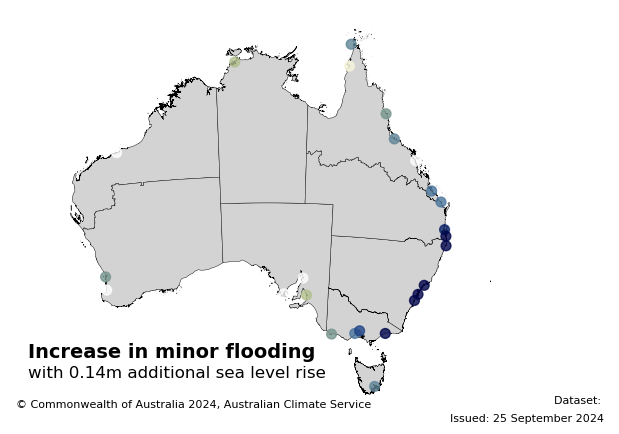

In [23]:
%%time 

var = "0.2m 50th percentile"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")

centre_text = iter(["National mean:\n19.9 days", "National mean:\n81.8 days"])
for var in ["0.2m 50th percentile", "0.38m 50th percentile"]:
    plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                    regions = regions,
                    cmap=cmap_dict["ipcc_slev_seq"],
                    ticks=[0,10,20,30,40,50,75,100,125,150,175,200],
                    cbar_extend="max",
                    title = "Increase in minor flooding",
                    date_range = "with 0.14m additional sea level rise",
                    cbar_label = "annual exceedances\n[days/year]",
                    dataset_name = "",
                    watermark=None,
                    figsize=(6,4),
                    facecolor="lightgrey",

                   );

CPU times: user 1min 57s, sys: 234 ms, total: 1min 57s
Wall time: 1min 57s


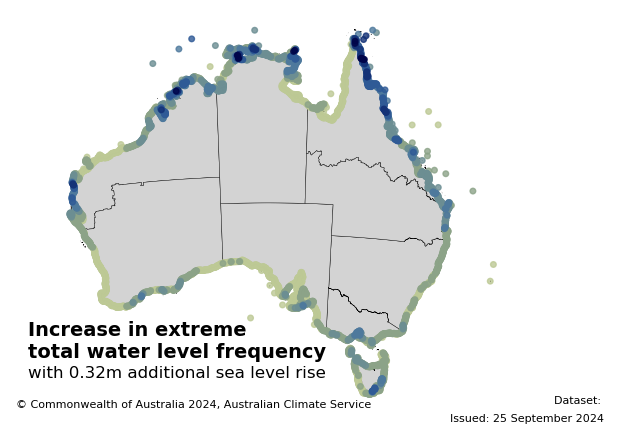

In [24]:
%%time 
var = "MTWL_MFSLR_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/MF/MFSLR_ACSSH_MMALL_SLR38cm.csv")
df = df.rename(columns = {"latitude":"lat", "longitude":"lon"})

plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                regions = regions,
                # cmap=cmap_dict['hot_r'],
                cmap=cmap_dict["ipcc_slev_seq"],
                ticks=[0, 1, 2, 5, 10, 20, 50, 100, 200],
                cbar_extend="max",
                title = "Increase in extreme \ntotal water level frequency",
                # text_centre="National mean: Extremes occur\n8.8 times more often than at present\n",
                date_range = "with 0.32m additional sea level rise",
                cbar_label = "Factor of \nfrequency increase",
                dataset_name = "",
                show_logo=False,
                watermark=None,
                figsize=(6,4),
                facecolor="lightgrey",
               );

CPU times: user 3min 50s, sys: 510 ms, total: 3min 50s
Wall time: 3min 50s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

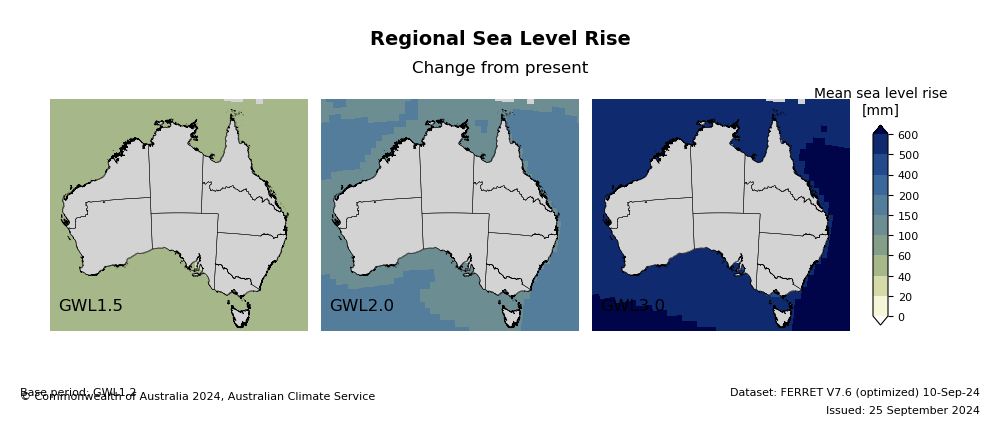

In [25]:
%%time
# regional sea level rise
var="SL1"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW1.5_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW2.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/coastal/MSL/AR6_CSIRO_AUS_GW3.0_GW1.2.nc")\
.rename({"LON106_165":"lon", "LAT41_85":"lat"}).sel(PERCENTILE=50.0).drop_vars(["TYEAR", "PERCENTILE", "PERCENTILE_bnds"])

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Regional Sea Level Rise",
                    date_range="Change from present",
                    baseline="GWL1.2",
                    cmap = cmap_dict["ipcc_slev_seq"],
                    ticks = [0, 20, 40, 60, 100, 150, 200, 400, 500, 600, ],
                    cbar_label = "Mean sea level rise\n[mm]",
                    dataset_name = "FERRET V7.6 (optimized) 10-Sep-24",
                    cbar_extend="both",
                    watermark="",
                   mask_not_australia=False,
                   mask_australia=True)

CPU times: user 2min 7s, sys: 226 ms, total: 2min 8s
Wall time: 2min 8s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

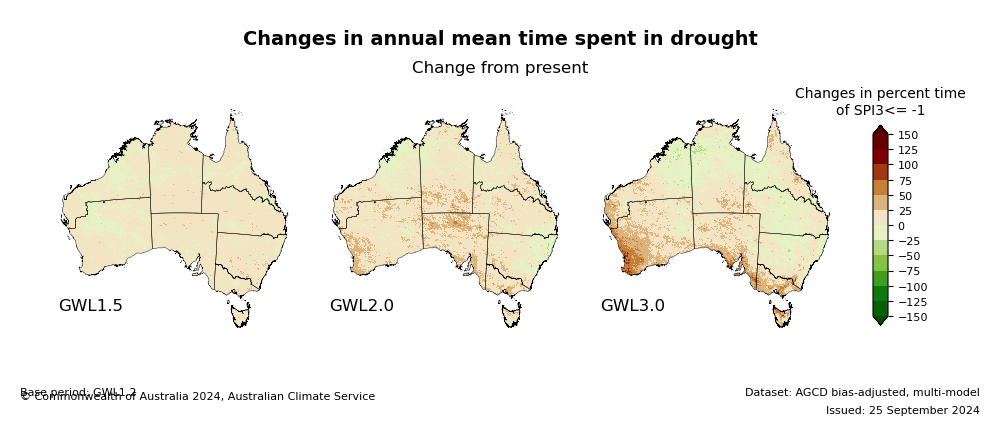

In [26]:
%%time
var="SPI3"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL1.5_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL2.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Changes in annual mean time spent in drought",
                    date_range="Change from present",
                    baseline="GWL1.2",
                    cmap = cmap_dict["aridity_anom_r"],
                    ticks = np.arange(-150, 151, 25),
                    cbar_label = "Changes in percent time\nof SPI3<= -1",
                    dataset_name = "AGCD bias-adjusted, multi-model",
                    cbar_extend="both",
                    watermark="",)

CPU times: user 2min 7s, sys: 343 ms, total: 2min 7s
Wall time: 2min 28s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

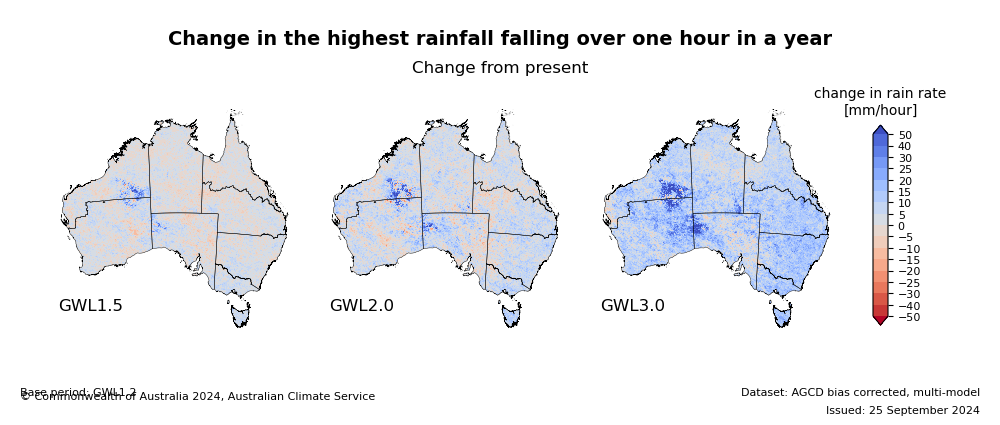

In [27]:
%%time
var = "prhmax"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the highest rainfall falling over one hour in a year",
                    date_range="Change from present",
                    baseline="GWL1.2",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in rain rate\n[mm/hour]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    cbar_extend="both",
                    watermark="",)

CPU times: user 2min 4s, sys: 290 ms, total: 2min 4s
Wall time: 2min 4s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

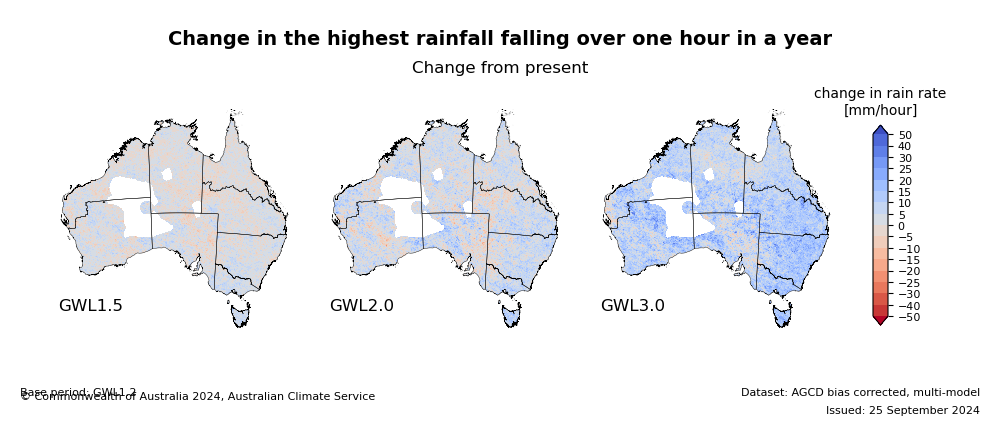

In [28]:
%%time
var = "prhmax"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/RX1H_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the highest rainfall falling over one hour in a year",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in rain rate\n[mm/hour]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    cbar_extend="both",
                    watermark="",
                   agcd_mask=True,
                   cmap_bad="w")

CPU times: user 2min 3s, sys: 244 ms, total: 2min 3s
Wall time: 2min 3s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

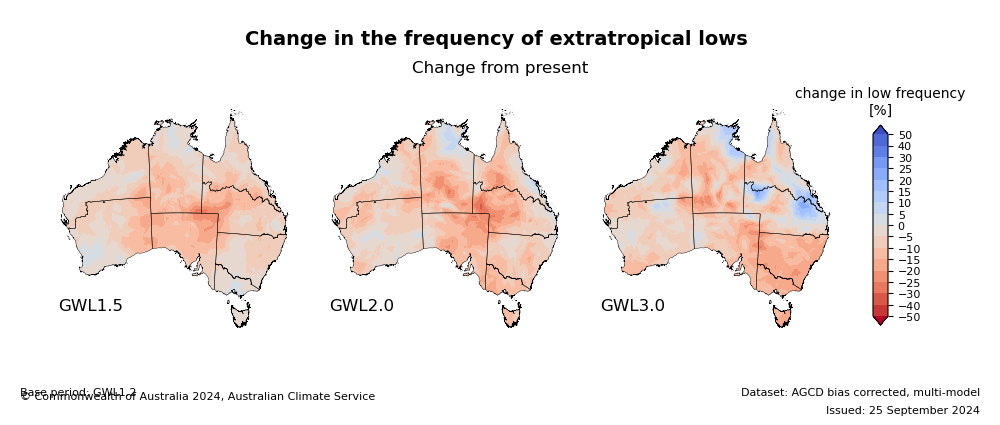

In [29]:
%%time
var = "low_freq"

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    regions = regions,
                    title = "Change in the frequency of extratropical lows ",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in low frequency\n[%]",
                    dataset_name = "AGCD bias corrected, multi-model",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                  )

CPU times: user 2min 6s, sys: 272 ms, total: 2min 6s
Wall time: 2min 6s


(<Figure size 1000x400 with 5 Axes>, <GeoAxes: >)

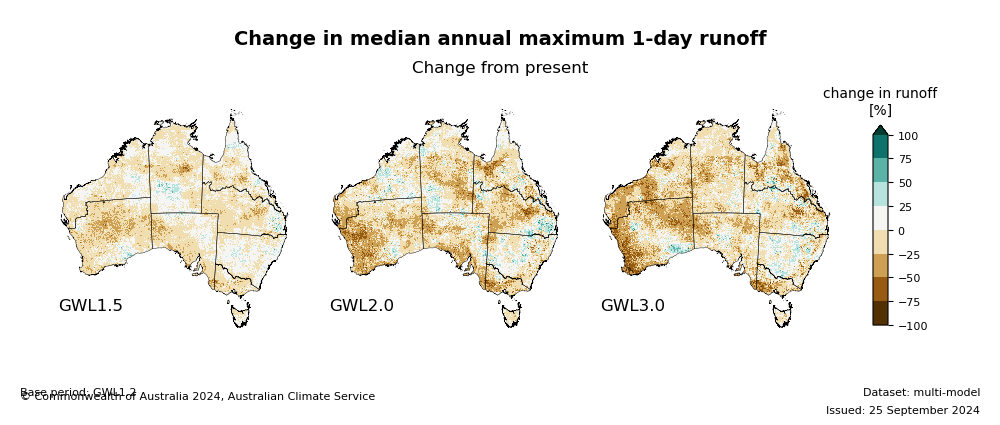

In [30]:
%%time

ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_1.5.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_2.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_3.nc").rename({"longitude":"lon", "latitude":"lat"}).sel(quantile = 0.5)

plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[f"runoff_1.5"],
                    ds_gwl20=ds_gwl20[f"runoff_2"],
                    ds_gwl30=ds_gwl30[f"runoff_3"],
                    regions = regions,
                    title = "Change in median annual maximum 1-day runoff",
                    baseline="GWL1.2",
                    date_range="Change from present",
                    cmap = cmap_dict["pr_anom"],
                    ticks = np.arange(-100, 101,25),
                    cbar_label = "change in runoff\n[%]",
                    dataset_name = "multi-model",
                    cbar_extend="max",
                    watermark="",)